In [15]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from matplotlib.colors import LogNorm




In [16]:
# Load the FITS file
filename = 'm42_40min_red.fits'  # Replace with your FITS file path
m42_d = fits.open(filename)


In [17]:
# Extract the image data
image_data = m42_d[0].data
m42_d.close()

# Check for NaN values and replace them with zero
image_data = np.nan_to_num(image_data)

# Convert the image data to a float32 type
image_data = np.array(image_data, dtype=np.float32)

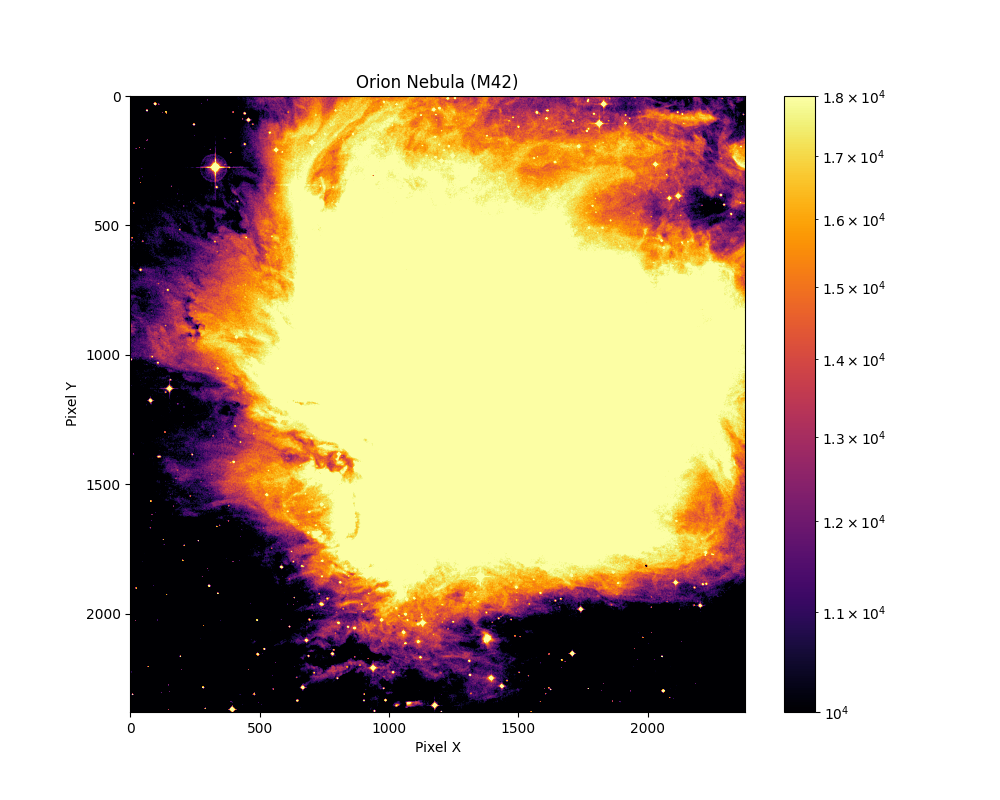

In [39]:
# Plot the image with logarithmic normalization


plt.figure(figsize=(10, 8))
plt.imshow(image_data, cmap='inferno', origin='upper', norm=LogNorm(vmin=10000, vmax=18000))
plt.colorbar()
plt.title('Orion Nebula (M42)')
plt.xlabel('Pixel X')
plt.ylabel('Pixel Y')
plt.show()

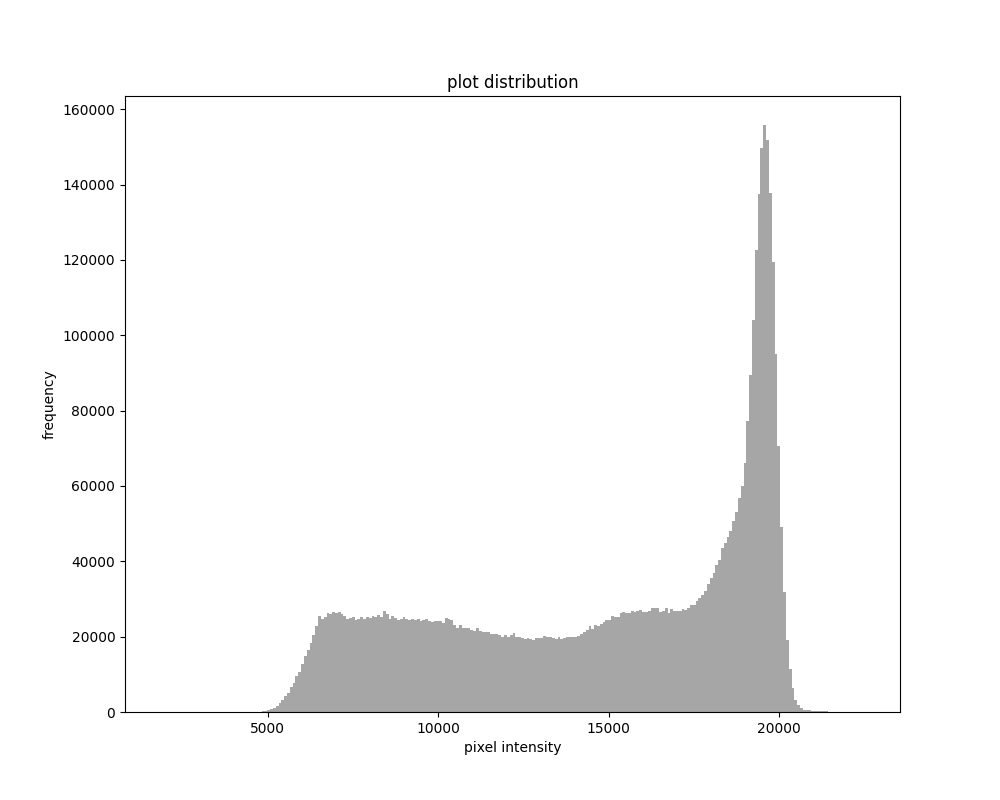

In [40]:
plt.figure(figsize=(10, 8))
plt.hist(image_data.flatten(),bins=250,alpha=0.7,color='gray')
plt.title('plot distribution')
plt.xlabel('pixel intensity')
plt.ylabel('frequency')
plt.show()

In [41]:
mean_pixel=np.mean(image_data)
median_pixel=np.median(image_data)
std_dev_pixel=np.std(image_data)

print(f"mean pixel: {mean_pixel}")
print(f"median pixel: {median_pixel}")
print(f"std dev pixel:{std_dev_pixel}")


mean pixel: 14795.7451171875
median pixel: 15995.0
std dev pixel:4558.5751953125


In [50]:
from astropy.io import fits

# Open your FITS file
with fits.open('m42_40min_red.fits') as hdul:
    hdul.info()  # This will show the HDU structure and help you understand where the data resides



Filename: m42_40min_red.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     129   (2376, 2381)   int16   


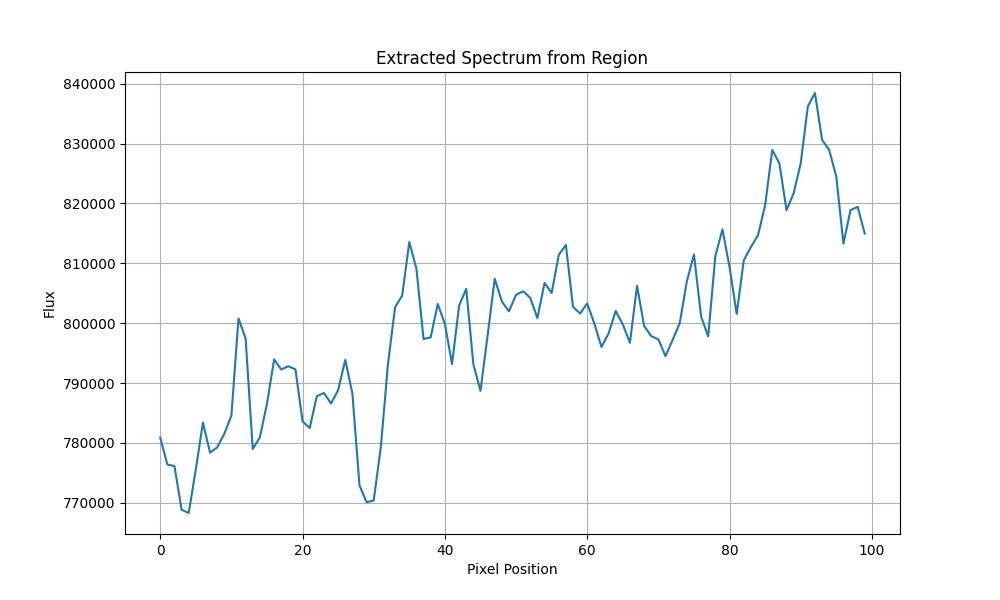

In [55]:
# Extracting  region of interest 
region = image_data[100:200, 100:200]  

# Sum along the columns to get a 1D spectrum (flux)
spectrum_flux = np.sum(region, axis=0)

# Plot the 1D spectrum
plt.figure(figsize=(10, 6))
plt.plot(spectrum_flux)
plt.title("Extracted Spectrum from Region")
plt.xlabel("Pixel Position")
plt.ylabel("Flux")
plt.grid(True)
plt.show()
